<a href="https://colab.research.google.com/github/Aflah3100/Pandas-Tutorial/blob/main/Pandas_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                          Python Pandas Library

In [1]:
import pandas as pd

In [2]:
#Mounting google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Creating a database folder

DatasetBaseFolder = '/content/gdrive/MyDrive/Colab Notebooks/PandasTl/Datasets/'

In [4]:
#Reading Csv File

movies_df = pd.read_csv(DatasetBaseFolder+"IMDB-Movie-Data.csv", index_col="Title")

In [7]:
#Reading first 5 rows

movies_df.head(5)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [8]:
#Reading the last 5 rows

movies_df.tail(5)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [9]:
#Printing the shape

print(movies_df.shape)

(1000, 11)


In [10]:
#Printing the overview of the csc file

print(movies_df.info)

<bound method DataFrame.info of                          Rank  ... Metascore
Title                          ...          
Guardians of the Galaxy     1  ...      76.0
Prometheus                  2  ...      65.0
Split                       3  ...      62.0
Sing                        4  ...      59.0
Suicide Squad               5  ...      40.0
...                       ...  ...       ...
Secret in Their Eyes      996  ...      45.0
Hostel: Part II           997  ...      46.0
Step Up 2: The Streets    998  ...      50.0
Search Party              999  ...      22.0
Nine Lives               1000  ...      11.0

[1000 rows x 11 columns]>


In [11]:
#Removing the duplicate instances by keeping the first

movies_df=movies_df.drop_duplicates(keep="first")

In [12]:
#Printing the columns of the csv file

movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [18]:
#Renaming the columns

movies_df.rename(columns = {'Runtime (Minutes)' : 'Runtime', 'Revenue (Millions)' : 'Revenue_millions'}, inplace=True)

#Printing the columns after renaming

movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

In [22]:
#Printing the null entries

movies_df.isnull()



,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,False,False,False,False,False,False,False,False,False,False,False
Prometheus,False,False,False,False,False,False,False,False,False,False,False
Split,False,False,False,False,False,False,False,False,False,False,False
Sing,False,False,False,False,False,False,False,False,False,False,False
Suicide Squad,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,False,False,False,False,False,False,False,False,False,True,False
Hostel: Part II,False,False,False,False,False,False,False,False,False,False,False
Step Up 2: The Streets,False,False,False,False,False,False,False,False,False,False,False


In [23]:
#Priting the null entries in each column

movies_df.isnull().sum()

Rank                  0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime               0
Rating                0
Votes                 0
Revenue_millions    128
Metascore            64
dtype: int64

In [37]:
#Droping all instances with null values

movies_dftm=movies_df.dropna(axis=0)

print(movies_dftm.shape)

(838, 11)


In [38]:
#Droping all the colums with null values

movies_dftm=movies_df.dropna(axis=1)

print(movies_dftm.shape)

(838, 11)


In [40]:
revenue = movies_df['Revenue_millions']
revenue.head(5)

Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
Name: Revenue_millions, dtype: float64

In [41]:
meanRev = revenue.mean(0)
revenue.fillna(meanRev, inplace=True)
movies_df.isnull().sum()

Rank                0
Genre               0
Description         0
Director            0
Actors              0
Year                0
Runtime             0
Rating              0
Votes               0
Revenue_millions    0
Metascore           0
dtype: int64

In [42]:
#Describing the dataset

movies_df.describe()

,Rank,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


In [43]:
movies_df['Genre'].value_counts()

Action,Adventure,Sci-Fi       50
Comedy,Drama,Romance          30
Drama                         29
Drama,Romance                 27
Comedy                        26
                              ..
Biography,History,Thriller     1
Action,Drama,Mystery           1
Biography,Drama,Mystery        1
Comedy,Family,Fantasy          1
Adventure,Comedy               1
Name: Genre, Length: 189, dtype: int64

In [44]:
#Correlating the attribute

movies_df.corr()

,Rank,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Rank,1.000000,-0.312809,-0.254783,-0.243125,-0.303284,-0.273170,-0.195909
Year,-0.312809,1.000000,-0.101933,-0.145703,-0.362445,-0.129198,-0.062303
Runtime,-0.254783,-0.101933,1.000000,0.374566,0.399298,0.281721,0.221397
Rating,-0.243125,-0.145703,0.374566,1.000000,0.517452,0.217106,0.672731
Votes,-0.303284,-0.362445,0.399298,0.517452,1.000000,0.636833,0.332674
Revenue_millions,-0.273170,-0.129198,0.281721,0.217106,0.636833,1.000000,0.142397
Metascore,-0.195909,-0.062303,0.221397,0.672731,0.332674,0.142397,1.000000


In [45]:
#Slicing the columns
sub=movies_df[['Genre','Rating']]
print(sub)

                                             Genre  Rating
Title                                                     
Guardians of the Galaxy    Action,Adventure,Sci-Fi     8.1
Prometheus                Adventure,Mystery,Sci-Fi     7.0
Split                              Horror,Thriller     7.3
Sing                       Animation,Comedy,Family     7.2
Suicide Squad             Action,Adventure,Fantasy     6.2
...                                            ...     ...
Resident Evil: Afterlife   Action,Adventure,Horror     5.9
Project X                                   Comedy     6.7
Hostel: Part II                             Horror     5.5
Step Up 2: The Streets         Drama,Music,Romance     6.2
Nine Lives                   Comedy,Family,Fantasy     5.3

[838 rows x 2 columns]


In [48]:
#Slicing rows

movies_df.loc['Prometheus']
movies_df.iloc[1]

Rank                                                                2
Genre                                        Adventure,Mystery,Sci-Fi
Description         Following clues to the origin of mankind, a te...
Director                                                 Ridley Scott
Actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
Year                                                             2012
Runtime                                                           124
Rating                                                              7
Votes                                                          485820
Revenue_millions                                               126.46
Metascore                                                          65
Name: Prometheus, dtype: object

In [49]:
movie_subset = movies_df.iloc[1:4]
movie_subset

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


In [52]:
#Selection based on condition
rating = movies_df['Rating']
rating[rating.gt(8.5)]


Title
Interstellar        8.6
The Dark Knight     9.0
Inception           8.8
Kimi no na wa       8.6
The Intouchables    8.6
Name: Rating, dtype: float64

In [53]:
#Selection based on driector
moviesByRidley = movies_df[(movies_df['Director'] == "Ridley Scott") & movies_df['Rating'].gt(7.5)]
moviesByRidley.head(4)

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0


In [54]:
movies_df[
    ((movies_df['Year'] >= 2005) & (movies_df['Year'] <= 2010))
    & (movies_df['Rating'] > 8.0)
    & (movies_df['Revenue_millions'] < movies_df['Revenue_millions'].quantile(0.25))
]

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


                                                              Python matplotlib 

In [55]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})

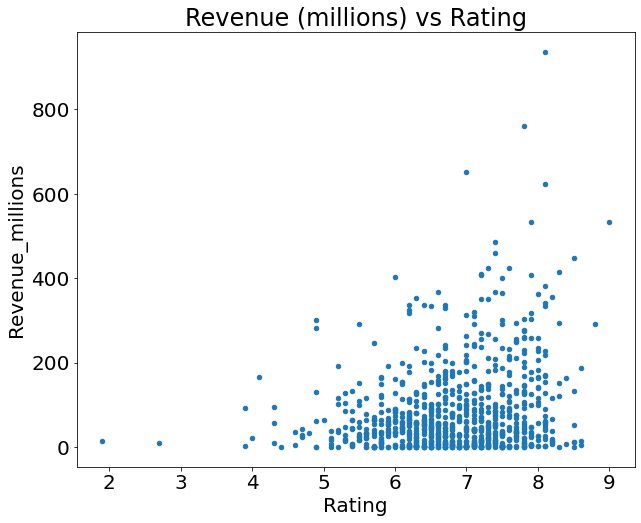

In [57]:
#Plottig the graph of movies_df
movies_df.plot(kind='scatter', x='Rating', y='Revenue_millions', title='Revenue (millions) vs Rating');

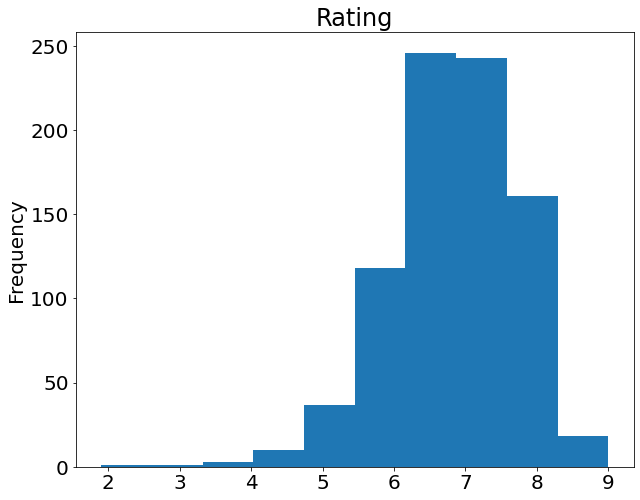

In [58]:
#Plotting histogram according the rating of the movies in movies_df
movies_df['Rating'].plot(kind='hist', title='Rating');

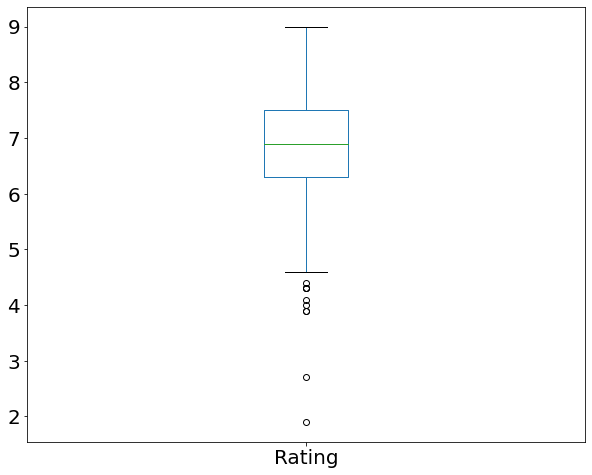

In [59]:
movies_df['Rating'].plot(kind="box");